# 3. **신경망**

- 입력층
- 은닉층 : 중간 층으로 뉴런이 사람 눈에 보이지 않음
- 출력층

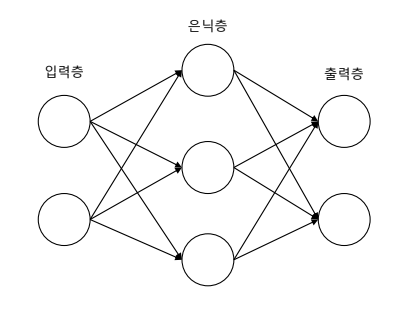

단층 퍼셉트론

각 신호의 총 합(가중치와 곱한 + 바이어스) a

h(x)는 활성화함수

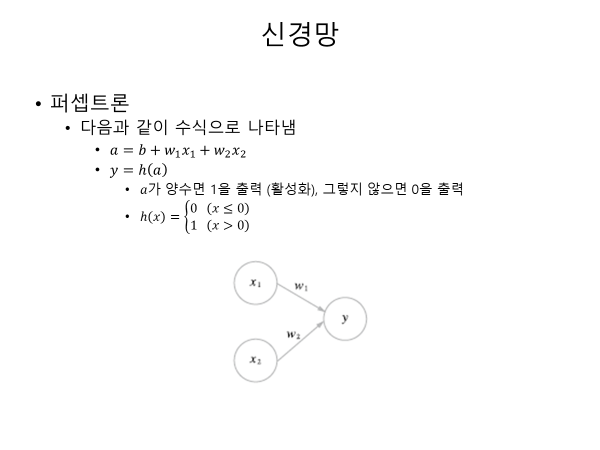

## 활성함수 h(x)

입력 신호의 총합을 출력 신호로 변환하는 함수

입력 신호의 총합이 활성화를 일으키는지를 결정함

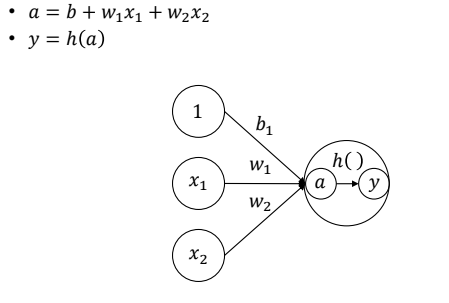

## 1) 계단함수

특정 입계값을 경계로 출력이 바뀌는 함수이다

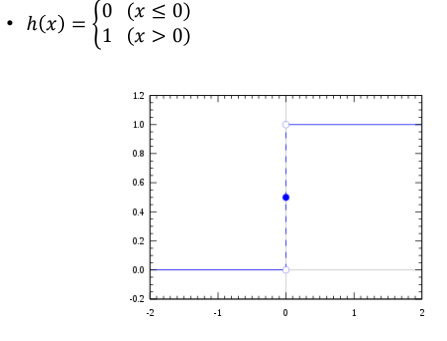

In [ ]:
import numpy as np

In [ ]:
#계단함수 구현하기

# def step_function(x):
#   if x>0:
#     return 1
#   else:
#     return 0      <- 실수만 받아들이는 함수가 된다

def step_function(x):
  y = x > 0
  return y.astype(np.int64) #y의 인수들이 bool 형식이라 정수형으로 바꿔줘야 한다
#numpy 배열을 인수로 받을 수 있음

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
print(x) #false true true
y = step_function(x)
print(y) #0 1 1

[-1.  1.  2.]
[0 1 1]


In [ ]:
import matplotlib.pylab as plt

In [ ]:
def step_function(x):
  return np.array(x > 0, dtype=np.int64) #위와 같은 기능을 하는데 형태가 살짝 다른 함수

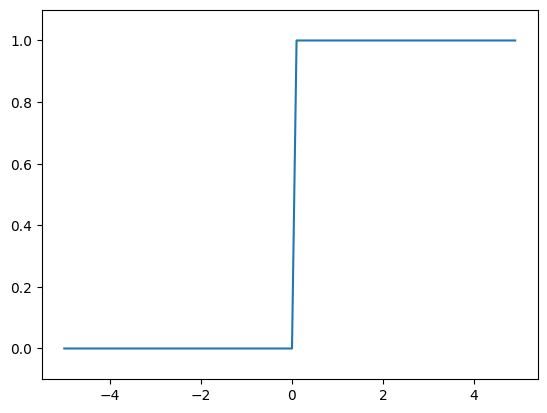

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

## 2) 시그모이드 함수

출력값이 0과 1 사이의 값을 가지는 함수이다

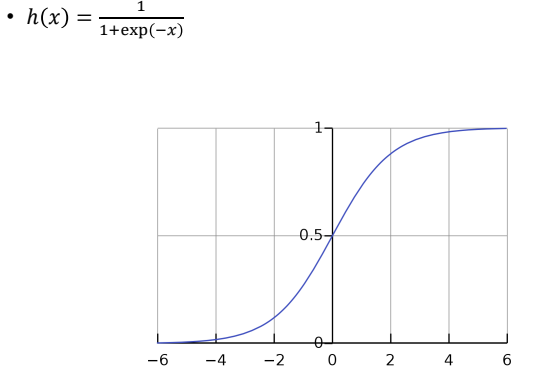

In [ ]:
#시그모이드 함수 구현하기

def sigmoid_function(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = sigmoid_function(x)
print(y)

[-1.  1.  2.]
[0.26894142 0.73105858 0.88079708]


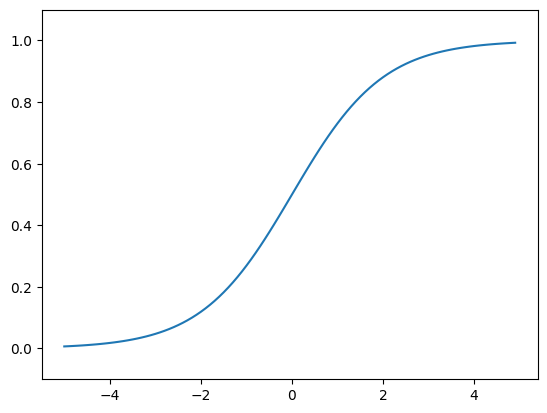

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수와 계단 함수 비교하기

- 시그모이드 함수 : 출력이 연속적으로 변화한다.
- 계단 함수 : 0을 경계로 출력이 비연속적으로 변화한다.

둘 다 출력이 0에서 1 사이인 비선형 함수이다.

선형 함수는 층을 아무리 깊게 해도 한 층의 네트워크와 동일한 기능을 한다. (같은 함수의 형태로 나타낼 수 있어...)

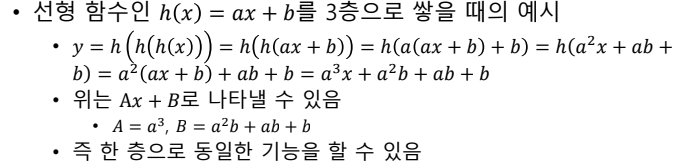

## 3) 비선형 함수

**ReLU 함수** : 입력이 0을 넘으면 입력을 그대로 출력, 0 이하면 0을 출력한다

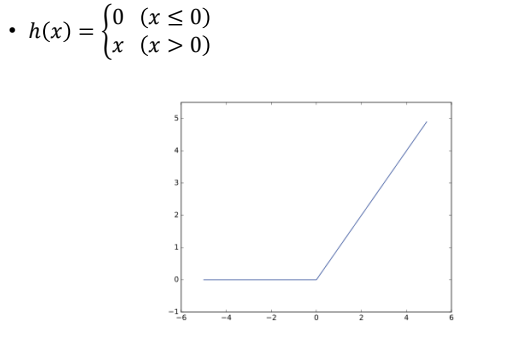

In [ ]:
#ReLU 함수 구현하기 - 0과 x 중 최대값을 반환하면 된다

def relu(x):
  return np.maximum(0, x)

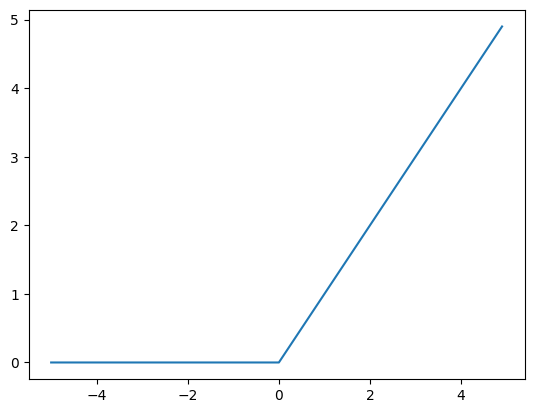

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)
plt.plot(X, Y)
plt.show()

## 다차원 배열

In [ ]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
print(np.ndim(B)) #B의 차원

2


In [ ]:
print(B.shape) #B의 형태

(3, 2)


In [ ]:
#행렬의 곱셈

A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print(np.dot(A, B))

[[19 22]
 [43 50]]


In [ ]:
#shape이 다른 행렬 간의 곱셈

A = np.array([[1,2, 3], [4, 5, 6]])
B = np.array([[1,2], [3,4], [5,6]])

print(np.dot(A, B))

[[22 28]
 [49 64]]


행렬의 형태 a x b, c x d 에서 b와 c가 같아야지 곱셈이 가능하다는 것을 잊지 마...

In [ ]:
# A: 2x3 C : 3x2

C = np.array([[1,2], [3,4], [3,4]])
np.dot(A,C)

array([[16, 22],
       [37, 52]])

# **3층 신경망 구현하기**

입력층, 2개의 은닉층, 출력층으로 구성된다

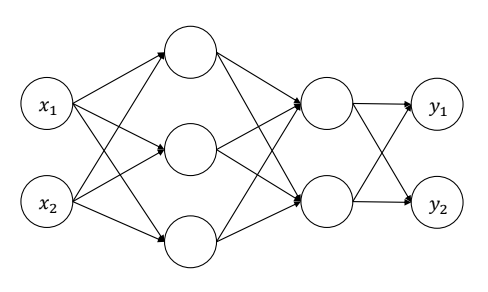

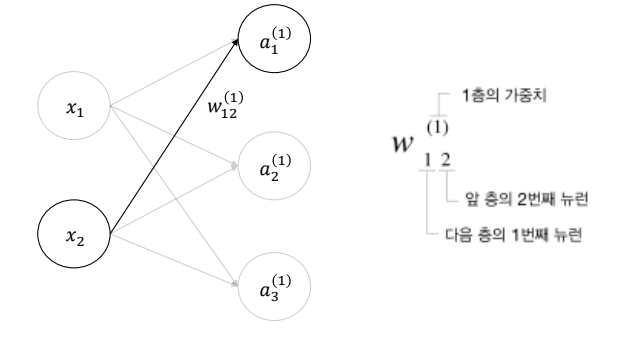

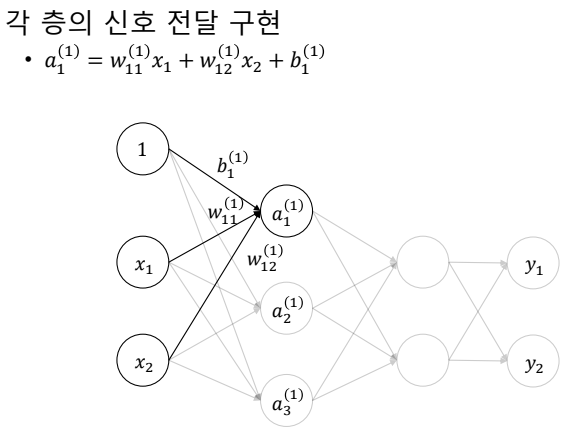

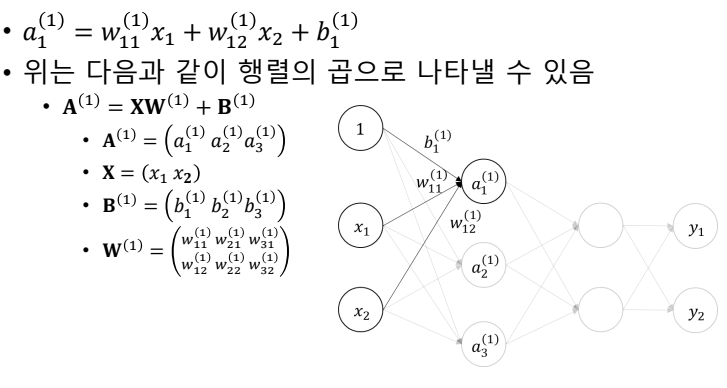

In [41]:
X = np.array([1,2]) #1차원 배열
print(X.shape)

W = np.array([[1,3,5], [2,4,6]]) #2차원 배열
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [44]:
# 3층 신경망 구현하기 - 입력층에서 1층으로 신호 전달 과정

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


In [48]:
# 3층 신경망 구현하기 - 활성화 함수(시그모이드) 처리하기

Z1 = sigmoid_function(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [49]:
# 3층 신경망 구현하기 - 1층에서 2층으로 신호 전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [51]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid_function(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [53]:
# 3층 신경망 구현하기 - 2층에서 출력층으로 신호 전달

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

Y = np.dot(Z2, W3) + B3
print(Y) #출력층에 활성함수가 아직 적용되지 않은 상황

[0.31682708 0.69627909]


In [69]:
def init_network(): #가중치와 bias를 초기화, 딕셔너리 network 에 저장한다
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  return network

In [70]:
def forward(network, x): #입력 -> 출력 방향(순전파)
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid_function(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid_function(a2)
  y = np.dot(z2, W3) + b3

  return y

In [68]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 1) 출력층 설계

- 분류 : 데이터가 어느 클래스에 속하느냐에 대한 문제(성별, 동물 종류...)
- 회귀 : 입력 데이터의 연속적인 수치를 예측하는 문제 (키, 거리...)

분류냐 회귀냐에 따라 사용하는 활성함수가 다르다


---


- 항등 함수 : 입력을 그대로 출력한다. 보통 회귀에서 사용한다.

- softmax 함수 : 출력이 0과 1 사이의 실수이고 출력의 총 합이 1이 된다. (출력을 확률로 볼 수 있음) 출력층에서의 소프트맥스 함수는 각 클래스에 대한 확률을 출력하는 것이라할 수 있다.

소프트맥스 함수

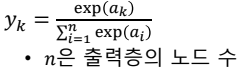

### softmax 함수 구현하기

In [73]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [74]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [75]:
y = exp_a / sum_exp_a
print(y)

print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [76]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 소프트맥스 함수 구현 시 주의사항

지수함수를 취하면 값이 매우 커지게 되는 경향이 있음. 그래서 컴퓨터로 계산 시 오버플로우 문제가 발생할 수 있다.

이를 해결하기 위해 임의의 상수 C를 이용한다

In [77]:
a = np.array([1010,1000,990])
a_softmax = np.exp(a) / np.sum(np.exp(a))
print(a_softmax)

[nan nan nan]


<ipython-input-77-8109b38db1cc>:2: RuntimeWarning: overflow encountered in exp
  a_softmax = np.exp(a) / np.sum(np.exp(a))
<ipython-input-77-8109b38db1cc>:2: RuntimeWarning: invalid value encountered in divide
  a_softmax = np.exp(a) / np.sum(np.exp(a))


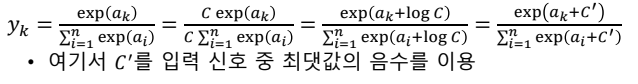

여기서 C'를 빼서 오버플로우 방지.

C'은 일반적으로 입력 신호 중 최댓값의 음수를 이용한다

In [81]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [82]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


출력층의 뉴런 수는 문제에 맞게 결정한다

분류에서는 분류하고 싶은 클래스의 수로 설정한다

# **손글씨 숫자 분류하기**

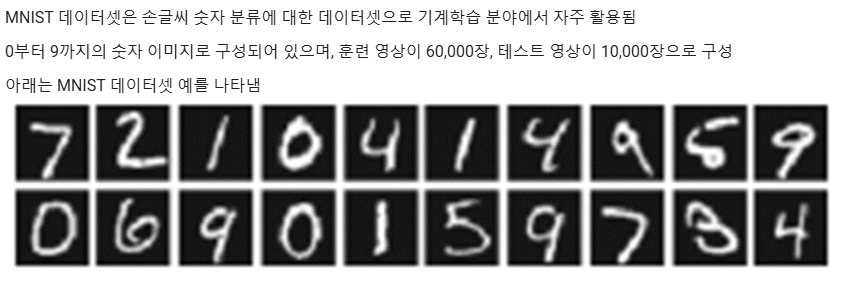

각 영상은 28x28 크기의 그레이 영상 (흑백 영상)이며, 각 픽셀은 0에서 255 사이의 값을 가진다

각 영상은 영상에 대응하는 실제 숫자가 레이블로 붙어 있다

아래는 MNIST 데이터셋을 가져오는 코드

In [86]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/2~3')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# (훈련 이미지, 훈련 레이블), (테스트 이미지, 테스트 레이블)
# flatten -> 28x28 영상을 784 크기의 1차원로 배열로
# normalize -> [0, 255] 영상을 [0, 1]로 정규화
# one_hot_label -> True인 경우 레이블을 원-핫 인코딩 형태로 저장
# 다음과 같이 해당되는 라벨만 1, 나머지는 0
# [0,0,1,0,0,0,0,0,0,0] '2' 만 True

#구현

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False, one_hot_label = False)

In [91]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [93]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

5


In [96]:
from PIL import Image
import matplotlib.pyplot as plt

(28, 28)
(28, 28)


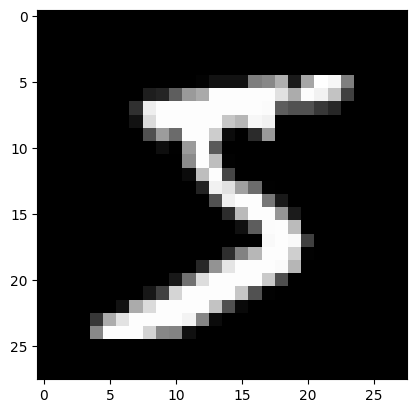

In [97]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
plt.imshow(img, cmap='gray')

In [112]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/2~3')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# 구현

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test #테스트 데이터 불러오기

def init_network():
  with open('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/2~3/sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)
  print("W1 : ", network['W1'].shape)
  print("W2 : ", network['W2'].shape)
  print("W3 : ", network['W3'].shape)
  return network

In [116]:
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  return y

In [117]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

# 정확도 측정
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

W1 :  (784, 50)
W2 :  (50, 100)
W3 :  (100, 10)
Accuracy:0.9352


# **배치 처리**

배치 : 하나로 묶은 입력 데이터




신경망 각 층의 배열 shape는 다음과 같음

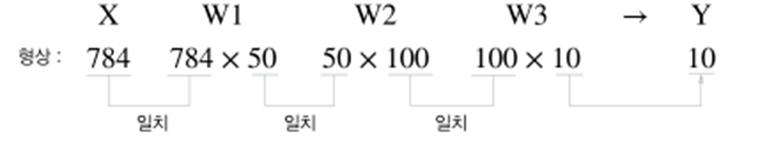

위는 한 장의 영상을 입력 데이터로 사용 했을 때의 경우임

영상 여러 장을 한꺼번에 입력으로 사용하는 경우:

영상 100개를 묶어 predict()함수에 한번에 넘겨서 처리

이에 대한 shape는 다음과 같음

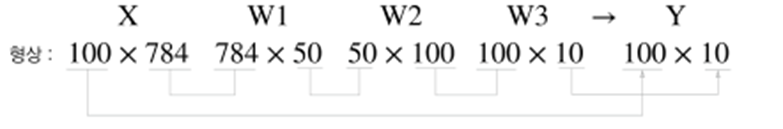

일반적으로 하나로 묶은 입력 데이터를 배치 (batch)라고 함

수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있으므로 작은 배열을 여러번 계산하는 것보다 배치 단위로 처리하는 것이 더 효율적임

In [123]:
x, t = get_data()
network = init_network()

W1 :  (784, 50)
W2 :  (50, 100)
W3 :  (100, 10)


In [125]:
batch_size = 100 #배치 크기
accuracy_count = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)

    p = np.argmax(y_batch, axis=1)

    accuracy_count += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_count) / len(x)))

Accuracy:0.9352


In [120]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x)
y = np.argmax(x, axis=1)
print(y)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
[1 2 1 0]


In [121]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])

print(y==t)

print(np.sum(y==t))

[ True  True False  True]
3


p와 y는 가장 잘 예측된 것을 의미한다